## About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

# Importing the relevat libiraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get Data

In [2]:
# Load the data 
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking For null values

In [3]:
iris.isnull().sum().any()

False

The *False* means that their is no null values in the dataset

### Drop The Id Column

In [4]:
# Drop Id col
iris.drop('Id',axis = 1 ,inplace = True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Summary Of the Numerical Attributes 

In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

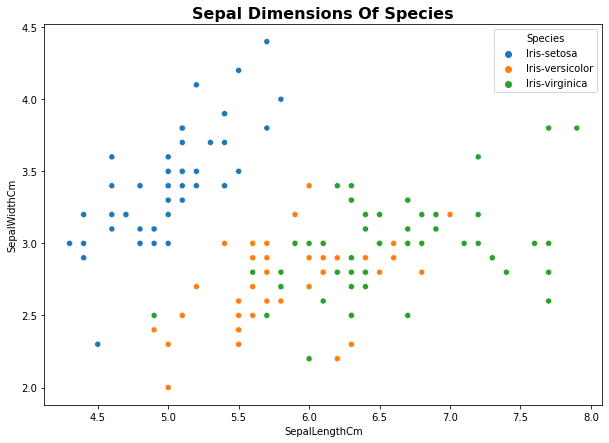

In [6]:
# First we will make a scatter plot to see the charactristics of sepal dimensions 
# Of the iris flowers
plt.figure(figsize=(10, 7))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",data=iris ,hue="Species")
plt.title("Sepal Dimensions Of Species", fontweight='bold', fontsize= 16)
plt.show()

As we can see here the Iris-setosa a short sepal length relative to the other two and relativly longer width, while the versicolor and verginica almost the same ratio between the length and width but the viginica has slightly higher ratio

### A quick box plot between all the features

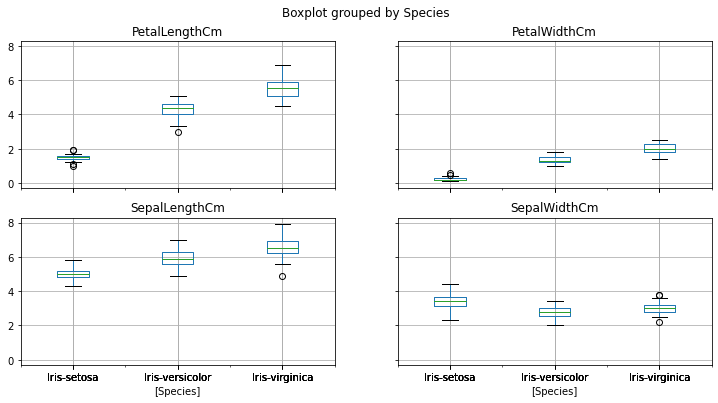

In [7]:
iris.boxplot(by="Species", figsize=(12, 6))
plt.show()

### let us look at an individual feature through a boxplot 

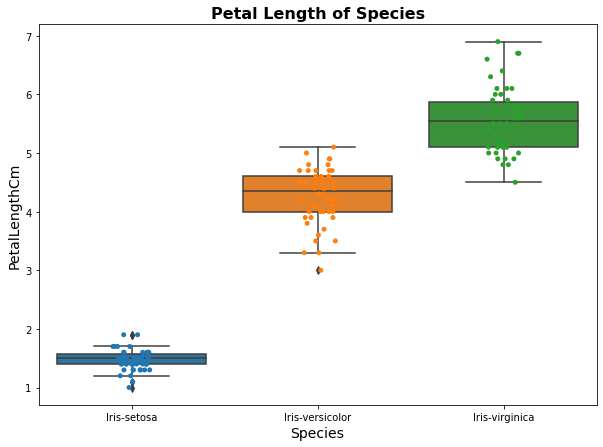

In [8]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

#### A more informative plot would be the violin plot

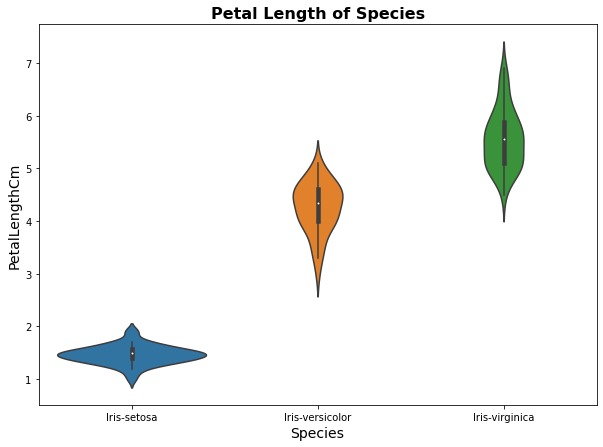

In [9]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

As you can see the petal length also in the setosa plant is shorter the the other two plants but also most of the satosa length are *between 1 and 2 CM* with no one longer than 2cm.

<a id="3"></a>
## Correlation Between Variables

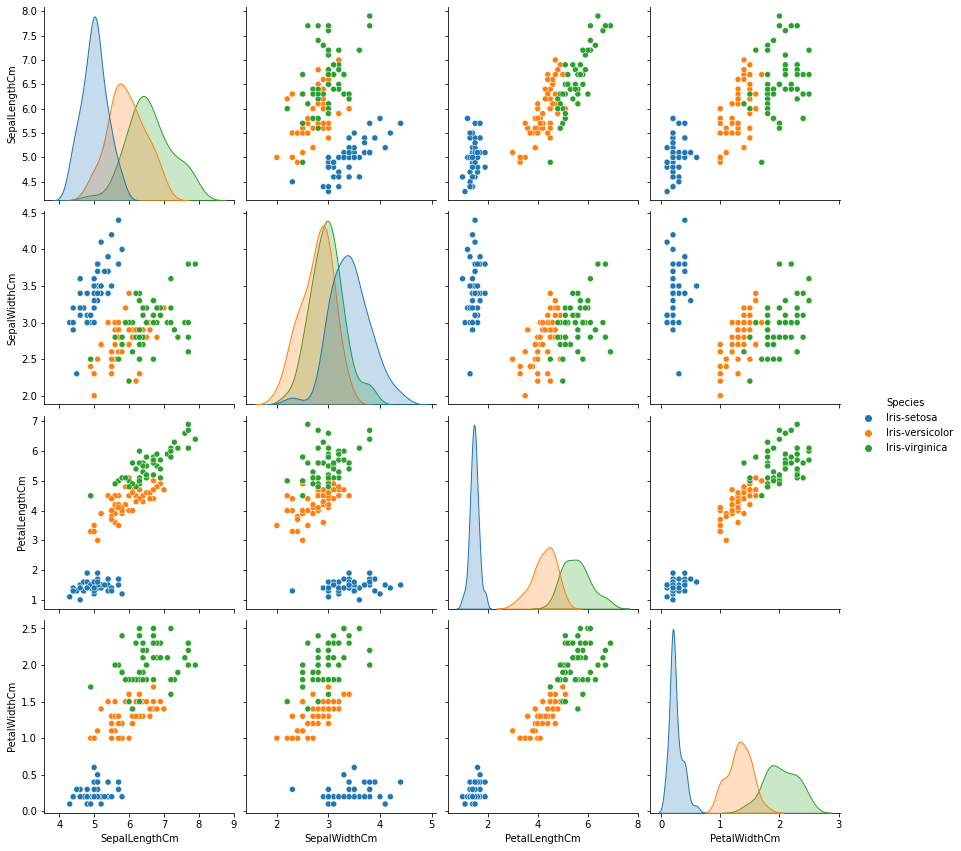

In [10]:
# Plots each numerical attribute against evry other numerical attribute
sns.pairplot(iris, hue="Species", height=3)
plt.show()

Almost in each we csn see high correlation espically with the "*Iris-setosa*"

In [11]:
# correlation between features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


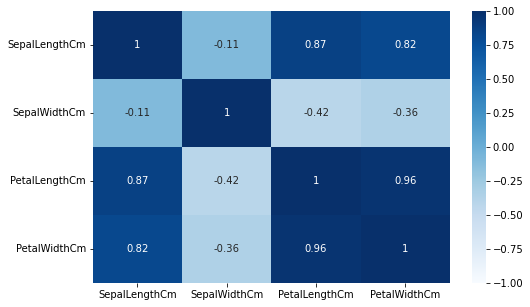

In [12]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(iris.corr(), cmap="Blues", vmin=-1, annot=True)
plt.show()

We can see three features which have high correlation: *Sepal Length*, *Petal Length* and *Petal Width*.
Comparing correlation matrix to the boxplots, gives the following **results**:

Primarily, three boxplots have the same pattern. Distribution of the “*Iris-setosa*” is in the low end, “*Iris-versicolor*” is in the middle and “*Iris-virginica*” is in the high end. This confirms high correlation between three features as we observed in correlation matrix.

Secondly, *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.

# Data Preparation

In [13]:
from sklearn.model_selection import train_test_split

# Spliting the data into attributes (X) and labels (y).
X = iris.drop("Species", axis=1)
y = iris["Species"].copy()

# Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)


In [14]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Encoding String labels into numbers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardisation for better processing data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# ColumnTransform enables us to transform differant types of columns in one pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, X_train.columns)
])


X_train_prepared = full_pipeline.fit_transform(X_train)
# X_test_prepared = full_pipeline.transform(X_test)
print(X_train_prepared[0])

[ 0.65970857 -0.54153256  1.02566534  1.33325463]


## Baseline Models

We will train few different models with its default settings, After compare accuracy of these models, we can make a list of the best models.

### Logistic Regression

In [15]:
# Importing the models
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()

# Implementing estimator and evaluate a score by use cross-validation
# During fourfold training and evaluation, train data is divided in 4 folds, where one in each is used for validation
scores_log = cross_val_score(log_reg, X_train_prepared, y_train, cv=4,scoring="accuracy")
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ",scores.std())
    
display_scores(scores_log)

Scores:  [0.93333333 1.         0.9        0.96666667]
Mean:  0.9500000000000001
Std:  0.03726779962499649


### K-Neighbors 

In [16]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier

# Insentiating the model
knn_clf = KNeighborsClassifier()

scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_knn)

Scores:  [0.96666667 0.93333333 0.86666667 1.        ]
Mean:  0.9416666666666667
Std:  0.04930066485916346


### SVC

In [17]:
#importing the model
from sklearn.svm import SVC

# Insentiating the model
svm_clf = SVC()

scores_svm = cross_val_score(svm_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_svm)

Scores:  [0.93333333 0.96666667 0.86666667 1.        ]
Mean:  0.9416666666666667
Std:  0.04930066485916346


### DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

scores_tree = cross_val_score(tree_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_tree)

Scores:  [0.9        0.96666667 0.9        0.96666667]
Mean:  0.9333333333333333
Std:  0.033333333333333326


### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

scores_forest = cross_val_score(forest_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_forest)

Scores:  [0.93333333 1.         0.86666667 0.96666667]
Mean:  0.9416666666666667
Std:  0.04930066485916346


#### We need to analysis errors of our algorithms to make better preformace 


## Error Analysis

we will use confussion matrix to analsis the errors

In [20]:
from sklearn.model_selection import cross_val_predict

# making predictions to compare it with the acctual values
pred_log = cross_val_predict(log_reg, X_train_prepared, y_train, cv=4)
pred_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=4)
pred_svm = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=4)
pred_tree = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)
pred_forest = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)

print(pred_log[:5])

[2 1 1 2 1]


In [21]:
# Lets recall what these numbers mean
labels = le.classes_
en_labels = le.transform(labels)
for i, j in zip(labels, en_labels):
    print(i, ":", j)

Iris-setosa : 0
Iris-versicolor : 1
Iris-virginica : 2


In [22]:
from sklearn.metrics import confusion_matrix

# Each row in a confusion matrix represents a real class, whereas each column represents a predicted class
# The perfect classifier would have nonzero values only on its main diagonal 
print("Confusion Matrix Logistic Regression \n{}".format(confusion_matrix(y_train, pred_log)))
print("Confusion Matrix KNN \n{}".format(confusion_matrix(y_train, pred_knn)))
print("Confusion Matrix SVM \n{}".format(confusion_matrix(y_train, pred_svm)))
print("Confusion Matrix Decision Tree \n{}".format(confusion_matrix(y_train, pred_tree)))
print("Confusion Matrix Random Forest \n{}".format(confusion_matrix(y_train, pred_forest)))

Confusion Matrix Logistic Regression 
[[39  0  0]
 [ 0 37  3]
 [ 0  3 38]]
Confusion Matrix KNN 
[[39  0  0]
 [ 0 37  3]
 [ 0  4 37]]
Confusion Matrix SVM 
[[39  0  0]
 [ 0 36  4]
 [ 0  3 38]]
Confusion Matrix Decision Tree 
[[39  0  0]
 [ 0 36  4]
 [ 0  4 37]]
Confusion Matrix Random Forest 
[[39  0  0]
 [ 0 37  3]
 [ 0  4 37]]


As we can see the "*Iris-setosa*" have not got any errors , but th other two have some.
We kind of predicted this from the box-plot in the EDA part 

so now we will try some feature engineering for better preformance

# Feature Engineering

the box plot mentioned above showes that the "*Iris-versicolor*" and "*Iris-virginica*" more overlab on *Sepal* features so we will make new features using the *Petal* features; we will raise the petal to the third power and divide them by other features

In [23]:
X_train["RelLength"] = X_train["PetalLengthCm"] **3 / X_train["SepalLengthCm"]
X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"] 
X_train["RelPetal"] = X_train["PetalWidthCm"] ** 3 / X_train["PetalLengthCm"] 

X_test["RelLength"] = X_test["PetalLengthCm"] ** 3 / X_test["SepalLengthCm"] 
X_test["RelWidth"] = X_test["PetalWidthCm"] ** 3 / X_test["SepalWidthCm"] 
X_test["RelPetal"] = X_test["PetalWidthCm"] ** 3 / X_test["PetalLengthCm"] 

C:\Users\AMIR\AppData\Local\Temp/ipykernel_16328/2299188688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["RelLength"] = X_train["PetalLengthCm"] **3 / X_train["SepalLengthCm"]
C:\Users\AMIR\AppData\Local\Temp/ipykernel_16328/2299188688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"]
C:\Users\AMIR\AppData\Local\Temp/ipykernel_16328/2299188688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

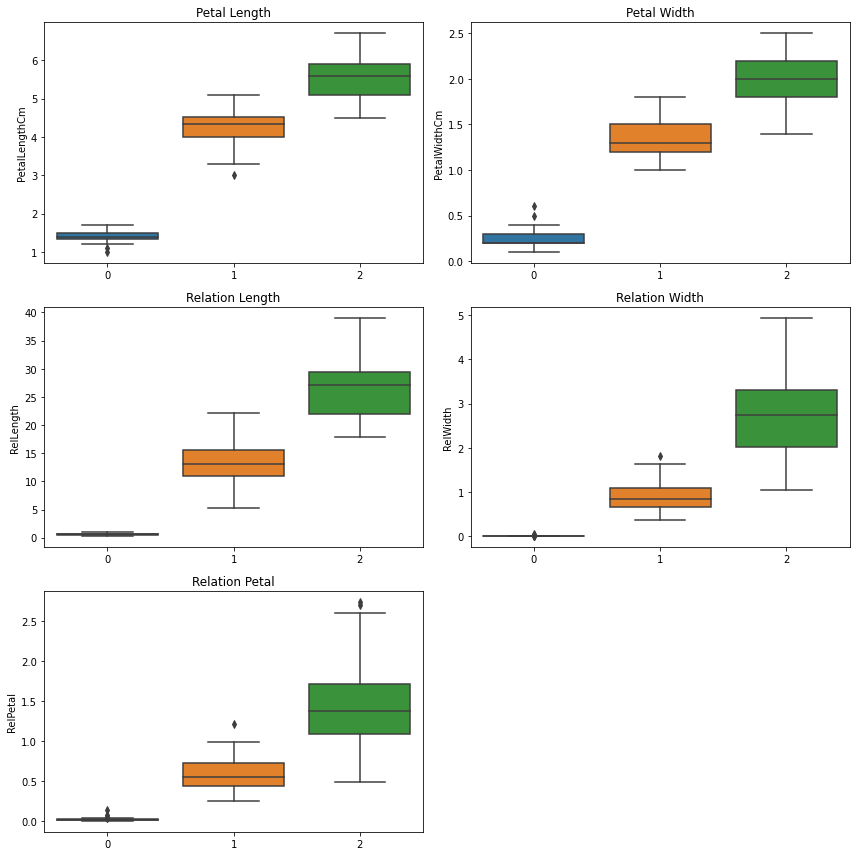

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x=y_train, data=X_train,)
plt.subplot(3,2,2)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x=y_train, data=X_train)
plt.subplot(3,2,3)
plt.title("Relation Length")
sns.boxplot(y="RelLength", x=y_train, data=X_train)
plt.subplot(3,2,4)
plt.title("Relation Width")
sns.boxplot(y="RelWidth", x=y_train, data=X_train)
plt.subplot(3,2,5)
plt.title("Relation Petal")
sns.boxplot(y="RelPetal", x=y_train, data=X_train)
plt.tight_layout()
plt.show()

In [25]:
# After adding the new features, we need to prepare the data again

X_train_new = X_train.copy()

# Making a new pipeline
full_pipeline_new = ColumnTransformer([
    ("num", num_pipeline, X_train_new.columns)
])

# Fitting the data
X_train_prepared_new = full_pipeline_new.fit_transform(X_train_new)
X_test_prepered_new = full_pipeline_new.transform(X_test)

# sanity check
print(X_train_prepared_new[0])

[ 0.65970857 -0.54153256  1.02566534  1.33325463  1.22533057  1.94991407
  1.68015214]


After feaure engineering, let us check the accuracy of our base models again

In [26]:
print("Logistic Regression")
scores_log_fe = cross_val_score(log_reg, X_train_prepared_new, y_train,cv=4, scoring= "accuracy")
display_scores(scores_log_fe)
print("###################################################################")
print("\nKNN")
scores_knn_fe = cross_val_score(knn_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_knn_fe)
print("###################################################################")
print("\nSVM")
scores_svm_fe = cross_val_score(svm_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_svm_fe)
print("###################################################################")
print("\nDecision Tree")
scores_tree_fe = cross_val_score(tree_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_tree_fe)
print("###################################################################")
print("\nRandom Forest")
scores_forest_fe = cross_val_score(forest_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_forest_fe)
print("###################################################################")

Logistic Regression
Scores:  [0.93333333 1.         0.93333333 0.96666667]
Mean:  0.9583333333333334
Std:  0.027638539919628325
###################################################################

KNN
Scores:  [0.93333333 1.         0.9        0.96666667]
Mean:  0.9500000000000001
Std:  0.03726779962499649
###################################################################

SVM
Scores:  [0.93333333 1.         0.93333333 0.96666667]
Mean:  0.9583333333333334
Std:  0.027638539919628325
###################################################################

Decision Tree
Scores:  [0.93333333 0.96666667 0.93333333 0.96666667]
Mean:  0.95
Std:  0.016666666666666663
###################################################################

Random Forest
Scores:  [0.93333333 1.         0.9        0.93333333]
Mean:  0.9416666666666667
Std:  0.036324157862838935
###################################################################


*As we can see the accuracy got higher, but we might now have overfitting in our models, let us check*

## Learning Curve
Learning curves indicates on model performance of the training set and the validation set.

In [27]:
from sklearn.model_selection import learning_curve

def learn_curve(model, X, y):
    """
    
    """
    train_sizes, train_scores, val_scores = learning_curve(model,X,y,cv=4,scoring="accuracy")
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    # printing scores 
    print("\n", "-"*5, model, "-"*5)
    print("Training scores: ")
    display_scores(train_scores_mean)
    print("\nValidation scores: ")
    display_scores(val_scores_mean)
    
    # Plot learning curve    
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(model)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.legend()


 ----- LogisticRegression() -----
Training scores: 
Scores:  [1.         0.99137931 0.9744898  0.97826087 0.975     ]
Mean:  0.9838259951656825
Std:  0.010145781710397666

Validation scores: 
Scores:  [0.84166667 0.925      0.94166667 0.95       0.95833333]
Mean:  0.9233333333333332
Std:  0.042295258468165065


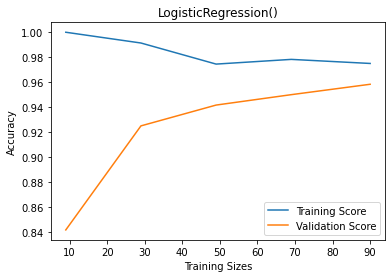

In [28]:
learn_curve(log_reg, X_train_prepared_new, y_train) # good fit


 ----- KNeighborsClassifier() -----
Training scores: 
Scores:  [0.88888889 0.96551724 0.95918367 0.96376812 0.96666667]
Mean:  0.9488049172692564
Std:  0.030066227632860813

Validation scores: 
Scores:  [0.575      0.93333333 0.95       0.95       0.95      ]
Mean:  0.8716666666666667
Std:  0.14847371634213397


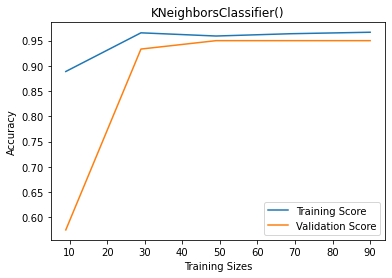

In [29]:
learn_curve(knn_clf, X_train_prepared_new, y_train) # good fit


 ----- SVC() -----
Training scores: 
Scores:  [1.         1.         0.9744898  0.97826087 0.97222222]
Mean:  0.9849945775411614
Std:  0.012402836181918645

Validation scores: 
Scores:  [0.825      0.93333333 0.95       0.95833333 0.95833333]
Mean:  0.925
Std:  0.050826502273256344


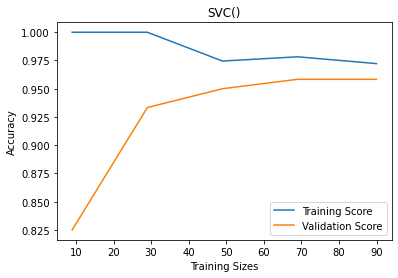

In [30]:
learn_curve(svm_clf, X_train_prepared_new, y_train) # good fit


 ----- DecisionTreeClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.86666667 0.93333333 0.94166667 0.93333333 0.94166667]
Mean:  0.9233333333333332
Std:  0.028577380332470443


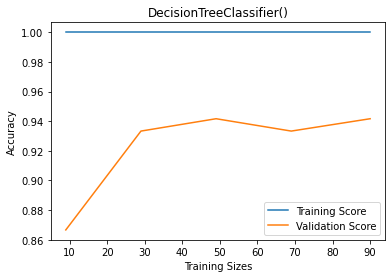

In [31]:
learn_curve(tree_clf, X_train_prepared_new, y_train) # overfit


 ----- RandomForestClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.89166667 0.95833333 0.95       0.95       0.95      ]
Mean:  0.9400000000000001
Std:  0.024381231397212964


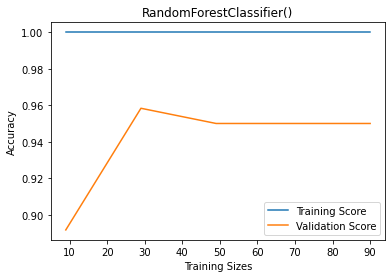

In [32]:
learn_curve(forest_clf, X_train_prepared_new, y_train) # overfit

The first three models (log_reg, knn_clf, svm_clf) indicate on a good fit models. However, we can make it better during hyperparameter tuning. In this case, we can decrease the bias.
Next two models (tree_clf, forest_clf) indicate overfitting. In order to improve performance, high variance should be reduced.

# Hyperparameter Tuning
We will use *GridSearchCV()* to search the best estimator parameters.
Another function RandomSearchCV() can make fastes search process.

## Logistic Regression


 ----- LogisticRegression(C=7) -----
Training scores: 
Scores:  [1.         1.         0.98979592 0.98550725 0.98333333]
Mean:  0.9917272996154984
Std:  0.007067575384350691

Validation scores: 
Scores:  [0.86666667 0.93333333 0.95       0.95833333 0.975     ]
Mean:  0.9366666666666668
Std:  0.037490739597339985
###############################################################

 ----- LogisticRegression() -----
Training scores: 
Scores:  [1.         0.99137931 0.9744898  0.97826087 0.975     ]
Mean:  0.9838259951656825
Std:  0.010145781710397666

Validation scores: 
Scores:  [0.84166667 0.925      0.94166667 0.95       0.95833333]
Mean:  0.9233333333333332
Std:  0.042295258468165065


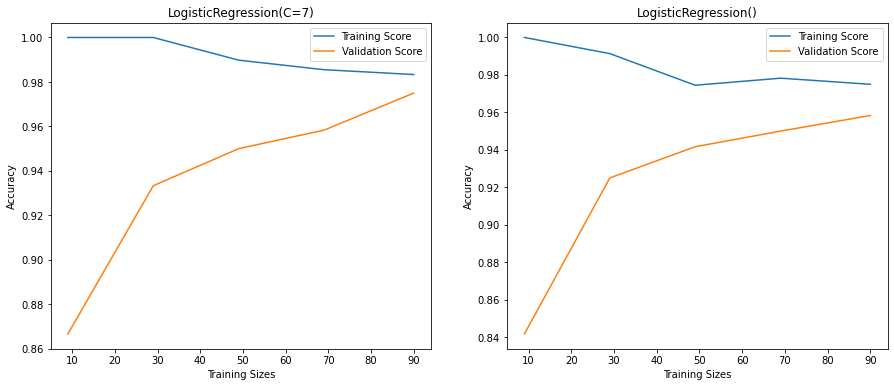

In [33]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_log = {
    'C': [0.1,0.25 ,0.5 ,0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 6, 7],
    'multi_class': ["auto","ovr","multinomial"]
}

# Insianting the model
grid_log = GridSearchCV(log_reg, param_grid_log, cv=4, scoring="accuracy")
grid_log.fit(X_train_prepared_new, y_train)

# Specifing the model with the best paramaters
log_reg_new = grid_log.best_estimator_

# Plotting the learning curve for both
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(log_reg_new, X_train_prepared_new, y_train)
print("###############################################################")
plt.subplot(1,2,2)
learn_curve(log_reg, X_train_prepared_new, y_train)

## KNN


 ----- KNeighborsClassifier() -----
Training scores: 
Scores:  [0.88888889 0.96551724 0.95918367 0.96376812 0.96666667]
Mean:  0.9488049172692564
Std:  0.030066227632860813

Validation scores: 
Scores:  [0.575      0.93333333 0.95       0.95       0.95      ]
Mean:  0.8716666666666667
Std:  0.14847371634213397

 ----- KNeighborsClassifier() -----
Training scores: 
Scores:  [0.88888889 0.96551724 0.95918367 0.96376812 0.96666667]
Mean:  0.9488049172692564
Std:  0.030066227632860813

Validation scores: 
Scores:  [0.575      0.93333333 0.95       0.95       0.95      ]
Mean:  0.8716666666666667
Std:  0.14847371634213397


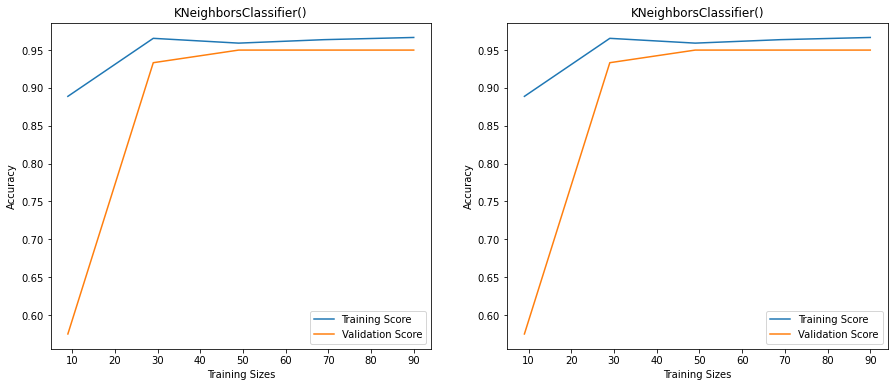

In [34]:
# Specifing the posible parameters
param_grid_knn = {
    "n_neighbors" :[5, 6, 7],
}

# Insintiating the model
grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=4,scoring="accuracy")
grid_knn.fit(X_train_prepared_new, y_train)

# Getting best estimators
knn_clf_new = grid_knn.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(knn_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(knn_clf, X_train_prepared_new, y_train)

## SVC


 ----- SVC(C=0.3375) -----
Training scores: 
Scores:  [0.63888889 0.99137931 0.96938776 0.97463768 0.96944444]
Mean:  0.9087476159879244
Std:  0.13516993870574037

Validation scores: 
Scores:  [0.34166667 0.95       0.95833333 0.95833333 0.95833333]
Mean:  0.8333333333333334
Std:  0.2458545188611437

 ----- SVC() -----
Training scores: 
Scores:  [1.         1.         0.9744898  0.97826087 0.97222222]
Mean:  0.9849945775411614
Std:  0.012402836181918645

Validation scores: 
Scores:  [0.825      0.93333333 0.95       0.95833333 0.95833333]
Mean:  0.925
Std:  0.050826502273256344


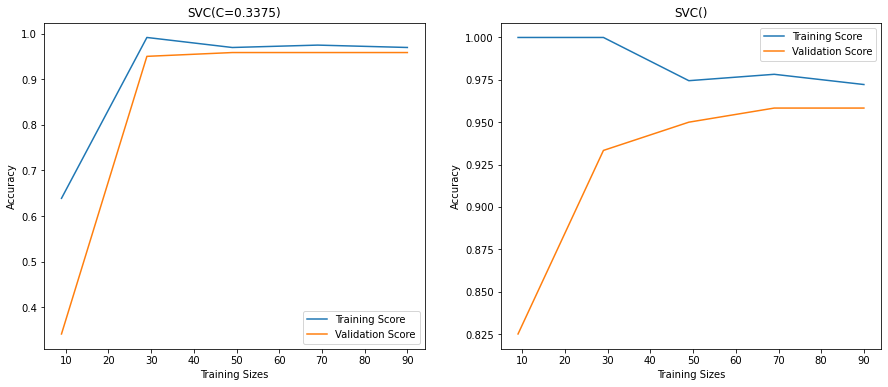

In [35]:
# SVC 
param_grid_svm = {
    'C': np.linspace(0.1, 2, 9),
    'gamma': ['scale', 'auto']    
}

grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=4, scoring='accuracy')
grid_svm.fit(X_train_prepared_new, y_train)

svm_clf_new = grid_svm.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(svm_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(svm_clf, X_train_prepared_new, y_train)


## Decision Tree



 ----- DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=8,
                       min_samples_split=7) -----
Training scores: 
Scores:  [0.58333333 0.87068966 0.94387755 0.96376812 0.96388889]
Mean:  0.8651115088714146
Std:  0.1449994774082612

Validation scores: 
Scores:  [0.34166667 0.75833333 0.95       0.93333333 0.94166667]
Mean:  0.7849999999999999
Std:  0.23282086580793307

 ----- DecisionTreeClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.9        0.94166667 0.94166667 0.925      0.94166667]
Mean:  0.9299999999999999
Std:  0.01632993161855456


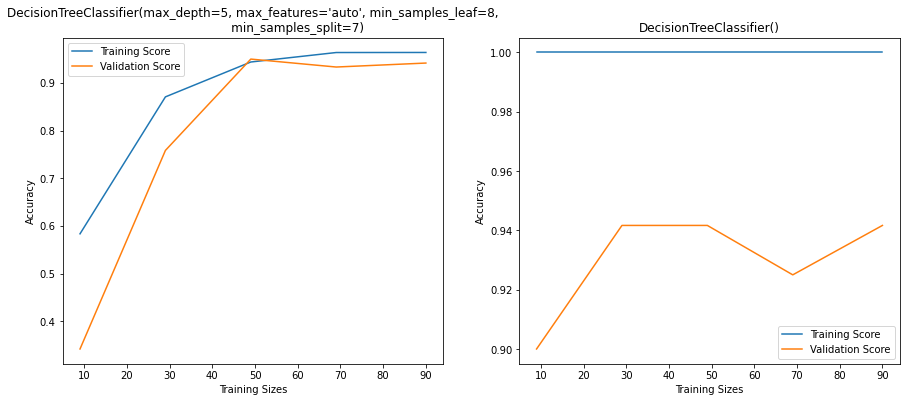

In [36]:
# Decision Tree
param_grid_tree = {
     'max_depth' : [4, 5, 6, 7, 8],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [4,5,6,7,8],
     'min_samples_split': [4, 5, 6, 7, 8]
}

grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=4, scoring='accuracy')
grid_tree.fit(X_train_prepared_new, y_train)

tree_clf_new = grid_tree.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(tree_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(tree_clf, X_train_prepared_new, y_train)

## Random Forest



 ----- RandomForestClassifier(max_depth=5, min_samples_leaf=7, n_estimators=6) -----
Training scores: 
Scores:  [0.58333333 0.78448276 0.97959184 0.97826087 0.975     ]
Mean:  0.8601337596507868
Std:  0.1573277149237626

Validation scores: 
Scores:  [0.34166667 0.61666667 0.94166667 0.95       0.94166667]
Mean:  0.7583333333333332
Std:  0.24398315060220405

 ----- RandomForestClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.9        0.95833333 0.95       0.95       0.95833333]
Mean:  0.9433333333333334
Std:  0.021984843263788197


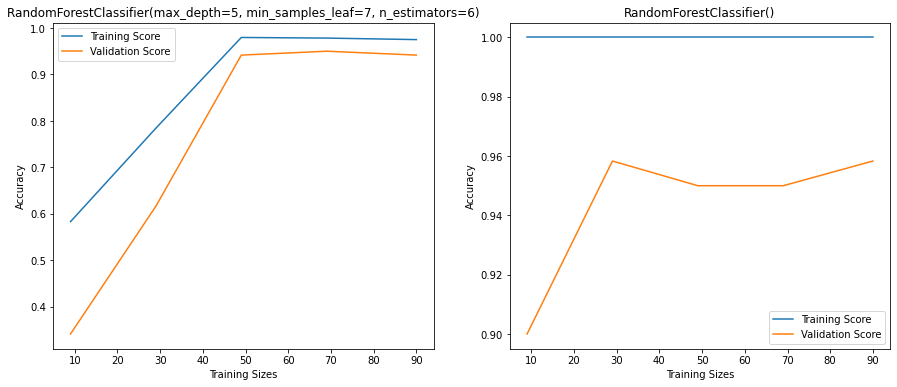

In [37]:
# Random Forest
param_grid_forest = {
     'n_estimators': [4, 5, 6],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [5, 6, 7, 8, 9],
     'max_depth' : [4, 5, 6]
}

grid_forest = GridSearchCV(forest_clf, param_grid_forest, cv=4, scoring='accuracy')
grid_forest.fit(X_train_prepared_new, y_train)

forest_clf_new = grid_forest.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(forest_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(forest_clf, X_train_prepared_new, y_train)

Almost every model achieves a better validation score.
Finally, we test our models on real data.

# Test our new model on un touched data

In [38]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression" : log_reg_new,
    "KNN" : knn_clf_new,
    "SVC" : svm_clf_new,
    "Decision Tree": tree_clf_new,
    "Random Forest": forest_clf_new
}

def test_score(model, X_train, X_test, y_train, y_test):
    for name , variable in model.items():
        variable.fit(X_train, y_train)
        y_pred = variable.predict(X_test)
        print(f'The accuracy of the {name} is {accuracy_score(y_test,y_pred)*100 :.2f} %.')
    

test_score(models, X_train_prepared_new, X_test_prepered_new, y_train, y_test)

The accuracy of the Logistic Regression is 100.00 %.
The accuracy of the KNN is 100.00 %.
The accuracy of the SVC is 100.00 %.
The accuracy of the Decision Tree is 100.00 %.
The accuracy of the Random Forest is 100.00 %.


## Observations:
- The Petal features give a better cluster division compared to the Sepal features.
- The species *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.
- The species *“Iris-virginica”* and *“Iris-versicolor”* overlap in these values, making them a little harder to distinguish.
